In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 

In [6]:
!kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory -f coin_Bitcoin.csv -p ./data --unzip

Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
License(s): CC0-1.0
  0%|                                                | 0.00/373k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 373k/373k [00:00<00:00, 724MB/s]


In [3]:
df = pd.read_csv("/workspaces/ml_zoomcamp/week_1/data/coin_Bitcoin.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
df.shape 

(2991, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [6]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values("Date")

df = df.drop(columns=["SNo", "Name", "Symbol"])

df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [9]:
df.describe()

,Date,High,Low,Open,Close,Volume,Marketcap
count,2991,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,2017-06-02 23:59:59.000000256,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
min,2013-04-29 23:59:59,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,2015-05-17 11:59:59,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,2017-06-02 23:59:59,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2019-06-20 11:59:59,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2021-07-06 23:59:59,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12
std,NaN,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11


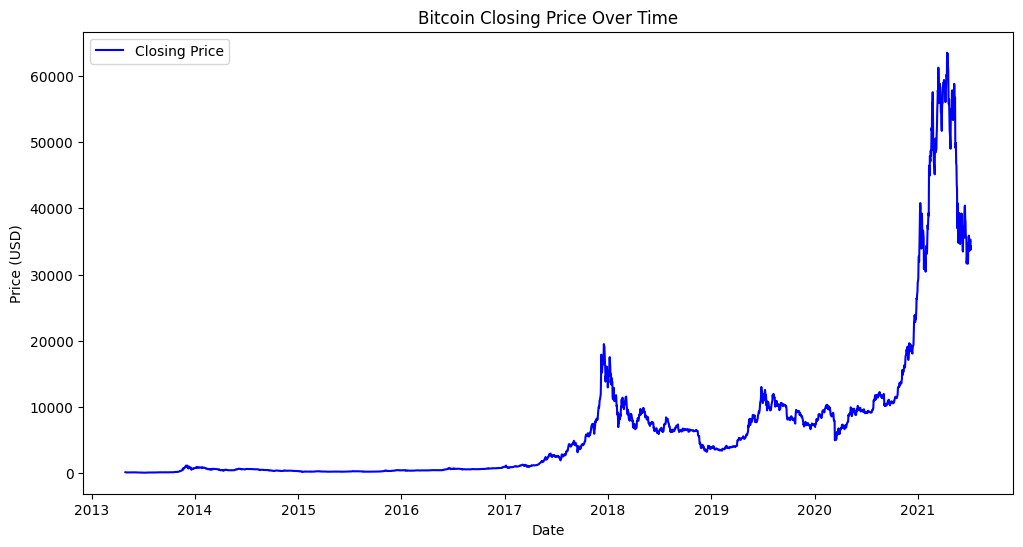

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue")
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend();

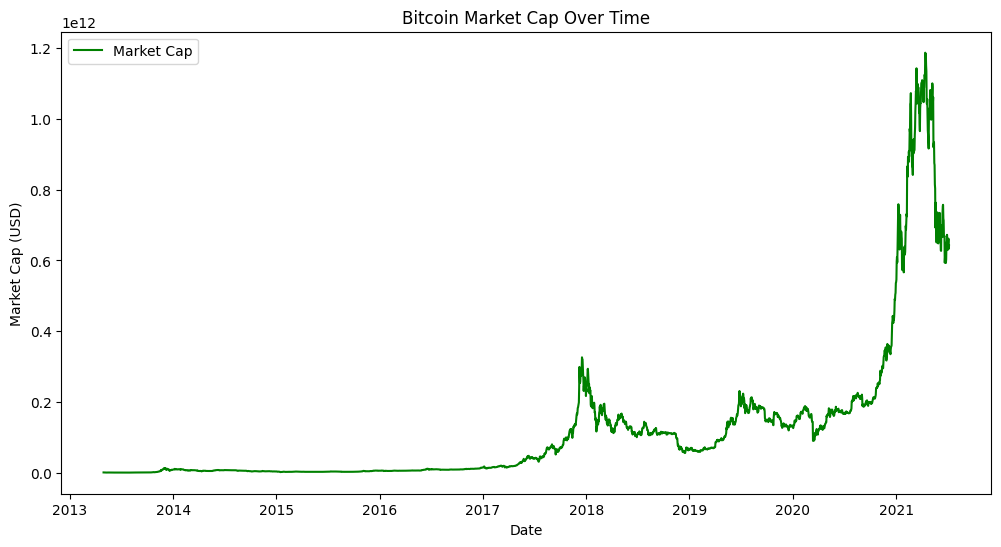

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Marketcap"], label="Market Cap", color="green")
plt.title("Bitcoin Market Cap Over Time")
plt.xlabel("Date")
plt.ylabel("Market Cap (USD)")
plt.legend();


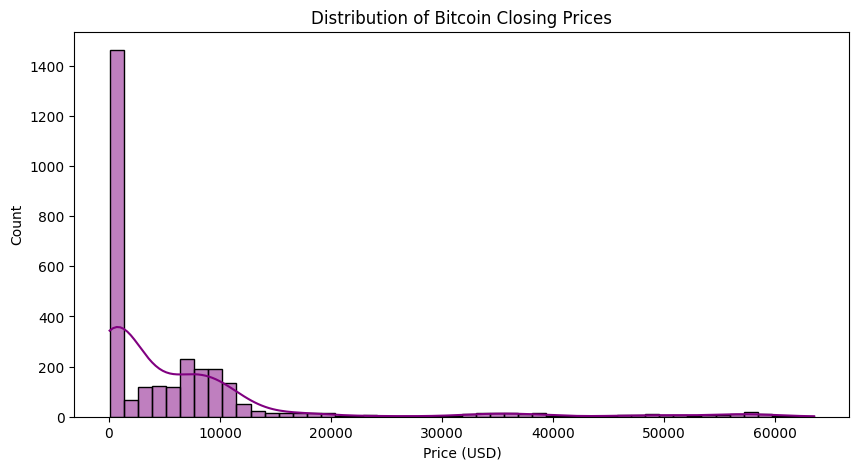

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df["Close"], bins=50, kde=True, color="purple")
plt.title("Distribution of Bitcoin Closing Prices")
plt.xlabel("Price (USD)");

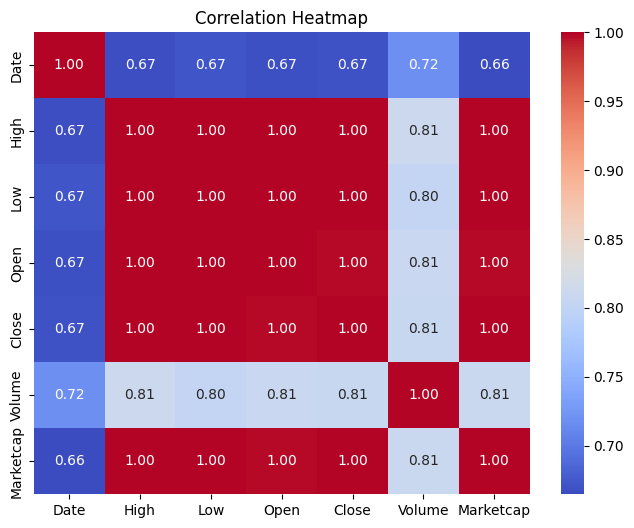

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap");

In [15]:
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])

fig.update_layout(
    title="Bitcoin Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    xaxis_rangeslider_visible=False
)

fig.show()

In [16]:
df["Daily_Return"] = df["Close"].pct_change()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df["Date"], y=df["Daily_Return"], mode="lines", name="Daily Return"))

fig.update_layout(title="Bitcoin Daily Returns",
                  xaxis_title="Date", yaxis_title="Return")
fig.show()